# Falling Slinky

### James O. Thomas

As you have seen, a falling slinky displays some interesting physics. In this notebook we will see if we can model this somewhat complicated motion using python. This is a modified from [here](https://mchouza.wordpress.com/2011/11/14/the-fall-of-the-slinky-i/).

Table of contents
1. [Discretization](#discretization) <br>
2. [Newton's Law](#f=ma) <br>
3. [Modeling](#modeling) <br>
  3.1 [Numeric Integration](#numeric_integration) <br>
  3.2 [Initial Position](#initial_position) <br>
  3.3 [Run the Simulation](#run) <br>

## Discretization 
<a id='discretization'></a>

The first step to solve problems numerically is to think of the problem as a series of small discret pieces instead of a continuous system. For us, we will break the slinky into a series of small masses separated by small, ideal springs. This can be seen in the image below. For this, we break the slinky into $N$ blocks which means we have $N-1$ small springs between each block.

![Slinky Discretization](images/Slinky_Discrete.PNG)

## Newton's Second Law
<a id='f=ma'></a>

Depending on where you are in class, you have likely heard of Newton's second law. $\sum \vec{F} = m\vec{a}$. We need to apply this to each individual small mass. On each small mass there are three forces, first there is the upward force from the spring above the block, $F_{up}$. Second is the force from the spring below the block, $F_{down}$. Finally, there is the force of gravity pointing downwards, $F_{grav}$. _note_ I defined down to be positive.

Putting these into Newton's second law we get 

$$
\begin{align}
ma &= - F_{up} + F_{down} + F_{grav} \\
m\frac{d^2x_i}{dt^2} &= k(x_{i+1} - x_i - l_0) - k(x_i - x_{i-1} - l_0) + mg \\
\therefore \frac{d^2x_i}{dt^2} &= g + \frac{k}{m} \left[ (x_{i+1} - x_i - l_0) - (x_i-x_{i-1} - l_0) \right] \\
\frac{d^2x_i}{dt^2} &= g + \frac{k}{m} \left[ x_{i+1} - 2x_i + x_{i-1} \right] \\
\end{align}
$$

As a little bit of background, the spring constant for springs added in series adds as reciporacals. So for a spring with an overall spring constant of $K$, that is broken into $N-1$ smaller the spring constant of the small spring $k$ is given by

$$
\begin{align}
\frac{1}{K} &= \frac{1}{k} + \cdots \frac{1}{k} \\
\frac{1}{K} &= \frac{N-1}{k} \\
\therefore k &= K(N-1)
\end{align}
$$

The mass of each block is $m = \frac{M}{N}$ as expected and the length of each small spring is $l_0 = \frac{L}{N-1}$ also as expected.

### Numeric Integration
<a id='numeric_integration'></a>

Geometrically, the _integral_ of a function is simply the area under the function. When you are first introduced to integration you were probably taught to break the curve into a bunch of rectangles where each rectangle has a height equal to the function evaluated at the middle (or an edge) of the rectangle width. The most simple approach to numeric integration is to do the exact same thing. Break the function you want to break into many small rectangles, then add the areas of those rectangles. [Hyperphysics.com](http://hyperphysics.phy-astr.gsu.edu/hbase/integ.html) has a great explanation of integration (and many other physics topics). As you can imagine, there are many modifications of this basic idea that are used for numeric integration. Whole classes can be filled with these techniques.

![Numeric Integration from http://hyperphysics.phy-astr.gsu.edu/hbase/integ.html](images/Numeric_Integration.PNG)
    
For this example I used the Runge-Kutta 4th order method. This method offers a nice compromize of accuracy and efficiency. inside a class called ```slinky```. More information can be found on the [Wikipedia](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) page. If you feel like a challenge you can try to modify the implementation in ```slinky_integrator.py```, but the details of this are beyond the scope of this class, there is plenty of python to be learned in the code within this notebook!

## Modeling in Python
<a id='modeling'></a>

Now we are ready to start implementing this in python, first we will tell jupyter to print the matplotlib files inside the notebook and define some constants

In [1]:
%matplotlib inline

### Set up Integrator

We can make an instance of the slinky object with the default values. You can play around with changing the default values if you have time. You can change them by instantiating the object with a comma delimeted list of the keyword and the value you want. For example 

```my_slinky = slk.slinky()``` creates a slinky object with all of the default values.

```my_slinky = slk.slinky(held = True)``` creates a slinky object that is helf on one end.

_NOTE:_ everytime you want to make a change to the object, you will need to rerun this cell. I have made variables of all of the default parameters so you can see them.

In [2]:
import slinky_integrator as slk

# the default parameters
NX = 40
L = 0.5
K = 5.0
M = 1.0
g = 9.8
NT = 1000
T = 1.0
held = False

my_slinky = slk.slinky()
#my_slinky = slk.slinky(held = True)

### Initial Position
<a id='initial_position'></a>

This is where we define the original position of the slinky. Feel free to try defining your own initial positions and see what happens.

In [3]:
def initial_x():
    '''
    This initial position corresponds to holding the slinky at one edge before dropping it
    Note, the first half of the list is the initial positions and the second half is the initial velocity
    '''
    L = 0.5 # if you change these when instantiating the object, change them here as well!
    NX = 40
    M = 1.0
    K = 5.0
    sl0 = L / (NX - 1)
    mm = M / NX
    sk = K * (NX - 1)
    w = M - mm
    x = [0.0 for i in range(2 * NX)]
    # the for loop is what you should change to change initial positions!
    for i in range(1, NX):
        x[i] = x[i - 1] + sl0 + g * w / sk
        w -= mm
    return x

### Run the Simulation
<a id='run'></a>

Now we are ready to actually run the simulation. You can save the output image to a separate file if you would like for later use.

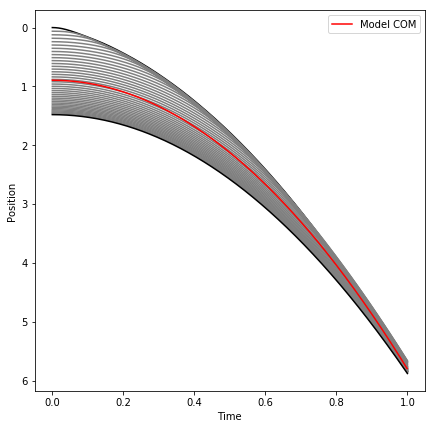

In [4]:
import matplotlib.pyplot as plt

def sim_slinky():
    xhist = [initial_x()]
    x_com = []
    for i in range(NT):
        xhist.append(my_slinky.rk4_step(xhist[-1]))
        x_com.append(my_slinky.get_COM(xhist[-1]))
    return xhist, x_com

NT = 1000
times = [i*T/NT for i in range(NT+1)] # the list of times used for plotting
def plot_and_save(output_fpath, hist, com):
    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111)
    ax.invert_yaxis()
    for j in range(NX):
        ax.plot(times,
                 [x[j] for x in hist],
                 color=('black' if j == 0 or j == NX-1 else 'gray'))
    ax.plot(times[:-1], com, color='red', label = 'Model COM')
    ax.set_xlabel('Time')
    ax.set_ylabel('Position')
    l = plt.legend()
    plt.show()
    #plt.savefig(output_fpath)

hist, com = sim_slinky()
plot_and_save('slinky.png', hist, com)
